# Project image processing

## Fog detection techniques


In [53]:
from commonfunctions import *
import math
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline
%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'cv2'

In [4]:
# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray, rgba2rgb

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [23]:
def sobel_fn(img,threshold):
    hx =  np.array([
        [-1,-2,-1],
        [ 0,0,0],
        [ 1,2,1]
    ])

    hy =  np.array([
        [ -1,0,1],
        [ -2,0,2],
        [ -1,0,1]
    ])
    xImg = convolve2d(img, hx)
    yImg= convolve2d(img, hy)
    
    newImg=np.sqrt(xImg**2+yImg**2) #edge strength
    
    newImg[newImg<threshold]=0
    newImg[newImg>threshold]=1
    
    return newImg

(185, 272)


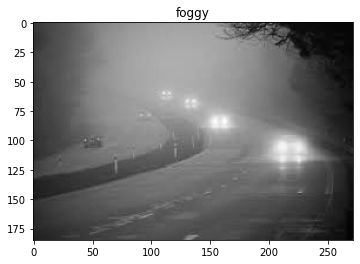

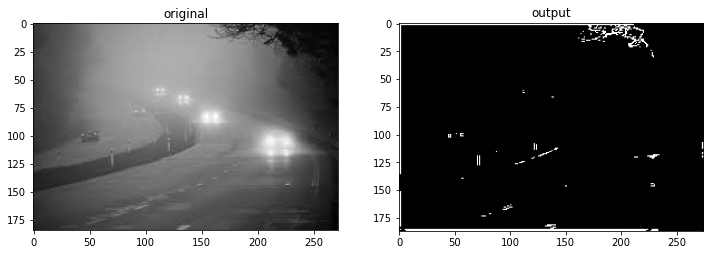

In [76]:

t1=rgb2gray(io.imread("imgs/1.jpeg"))
def fog(img):
    #sobel edge detection
    print(img.shape)

    width, height=img.shape
#     TODO------get a way to measure the sobel thresholf given to the function
    step1=sobel_fn(img,0.6)
    isSunny=np.sum(step1)
    
    #we use a threshold as a factor of the images size
    if(isSunny >0.07*width*height):
        show_images([img],["sunny"])
    else:
        show_images([img],["foggy"])  
        
    return step1


out=fog(t1)
show_images([t1,out],["original", "output"])


In [ ]:
# hough transform

# segmentation(sky-road)

# sky-road distance estimation